# SS Computer Assignment 3 
Mohammad Saadati - 
_810198410_

# Question 2

## Laplace Analysis

In [56]:
from lcapy import Circuit

### A

In [57]:
# a = Circuit("""
# V 1 0 {v(t)}; down
# R1 1 2; right
# L 2 3; right=1.5, i=i_L
# R2 3 0_3; down=1.5, i=i_{R2}, v=v_{R2}
# W 0 0_3; right
# W 3 3_a; right
# C 3_a 0_4; down, i=i_C, v=v_C
# W 0_3 0_4; right""")

a = Circuit("""
P1 1 0; down=1.5, v=v(t)
R1 1 2; right=1.5
L 2 3; right=1.5
R2 3 0_2; down
W 0 0_2; right
W 3 4; right
W 4 5; right
W 0_2 0_3; right
C 4 0_3; down
W 0_3 0_4; right
P2 5 0_4; down, v^=v_c(t)""")

### B

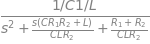

In [58]:
H = a.transfer(1, 0, 5, 0)
H.expr

### C

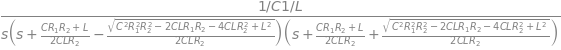

In [59]:
((1/s)*H).ZPK().expr

### D

In [60]:
a = a.subs({'R1': 4 , 'L': 2.5, 'R2': 2, 'C': 0.25})
H = a.P1.transfer('P2')
v_i = voltage(u(t))
V_i = v_i(s)
V_o = V_i*H
v_o = V_o(t)
v_o.simplify().expr

### E

In [55]:
i = a.C.i
i = i.LT()
v_i = voltage(u(t))
v_i = v_i.LT()
i/v_i

## Laplace Transform

In [61]:
from lcapy import *

f0 = symbol('f0')
x = (3-2*f0)*delta(t) + ( (f0**2)/2 + ((f0**2)/2 -6*f0 -2)*cos(2*t) + (3*(f0**2)/2 -2*f0 -6)*sin(2*t) )*u(t) + s(t)
x.expr

                  ⎛  2   ⎛  2           ⎞            ⎛    2           ⎞       
                  ⎜f₀    ⎜f₀            ⎟            ⎜3⋅f₀            ⎟       
(3 - 2⋅f₀)⋅δ(t) + ⎜─── + ⎜─── - 6⋅f₀ - 2⎟⋅cos(2⋅t) + ⎜───── - 2⋅f₀ - 6⎟⋅sin(2⋅
                  ⎝ 2    ⎝ 2            ⎠            ⎝  2             ⎠       

  ⎞                           
  ⎟         (1)               
t)⎟⋅u(t) + δ    (t)  for t ≥ 0
  ⎠                           

### A

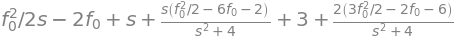

In [62]:
x.LT().expr

### B

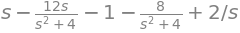

In [63]:
x(s).subs({f0:2}).expr

### C

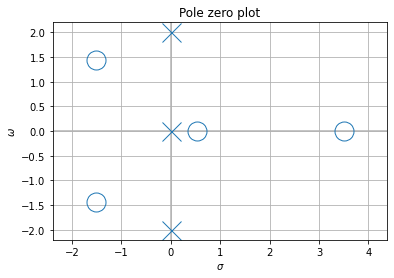

In [64]:
from lcapy import s, j, transfer
from matplotlib.pyplot import savefig

H = transfer(x(s).subs({f0:2}))
H.plot(xlabel=r'$\sigma$', ylabel=r'$\omega$', title='Pole zero plot')

savefig('tf1-pole-zero-plot.png')